В этой программе я создаю график количества сообщений от времени по неделям.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from datetime import date as d
from datetime import timedelta
import seaborn as sns

In [2]:
conn = sqlite3.connect('oleg.db')
cur = conn.cursor()

In [3]:
cur.execute('''
select date, count(date)
from meta
group by date''')

counted_dates = cur.fetchall()

In [4]:
cdd = {date[0]:date[1] for date in counted_dates}

In [5]:
first = d.fromisoformat(counted_dates[0][0])
last = d.fromisoformat(counted_dates[-1][0])
day = timedelta(days=1)

In [6]:
now = first
while now <= last:
    if str(now) not in cdd.keys():
        cdd[str(now)] = 0
    now += day

In [7]:
weeks = {}
now = first

while now <= last-day*7:
    weeks[d.isoformat(now)] = cdd[d.isoformat(now)]
    for i in range(7):
        weeks[d.isoformat(now)] += cdd[d.isoformat(now+day*i)]
    now += day*7

weeks[d.isoformat(now)] = cdd[d.isoformat(now)]
last_week = now
i = 1
while now < last:
    weeks[d.isoformat(last_week)] += cdd[d.isoformat(now+day*1)]
    i+=1
    now += day

На графике светлое - количество сообщений в неделю без сглаживания, темное - со сглаживанием 5. Черная линия y=250 нужна для того, чтобы можно было разграничить "низины" и пики. 

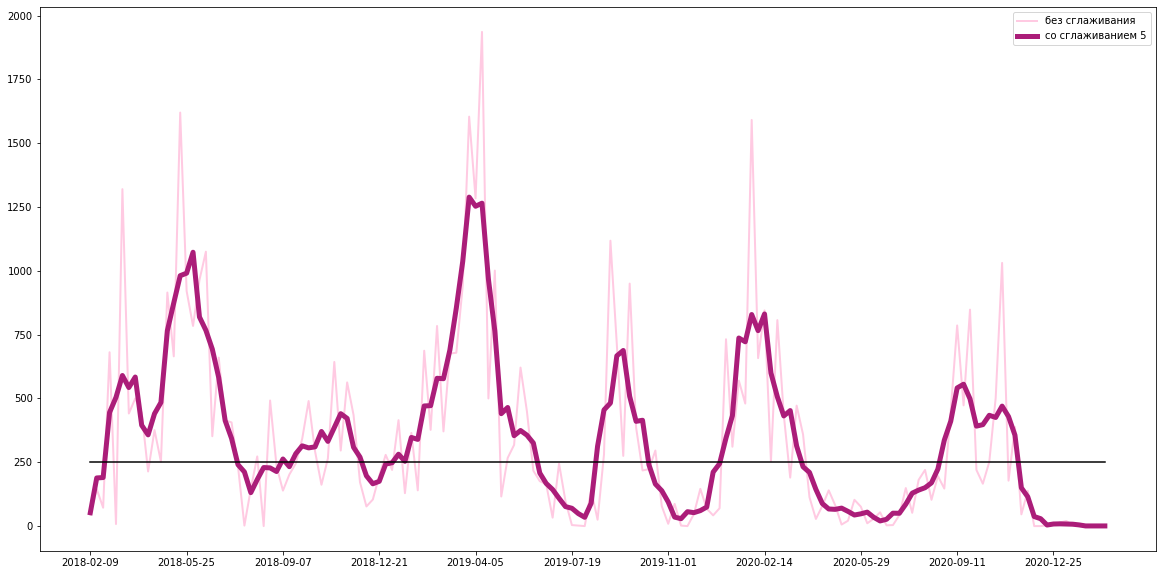

In [8]:
plt.figure(figsize=(20, 10))
x = [key for key in sorted(weeks.keys())]
y = [weeks[key] for key in sorted(weeks.keys())]
window_len = 5
kernel = np.ones(window_len, dtype=float)/window_len
y_smooth = np.convolve(y, kernel, 'same')

plt.plot(x, y, color = '#ffcae2', linewidth=2, label='без сглаживания')
plt.plot(x, y_smooth, color='#ab1d79', linewidth=5, label='со сглаживанием 5')
plt.plot(x, [250 for key in sorted(weeks.keys())], color='black')
plt.legend()

plt.xticks(np.arange(0, len(x)+1, 15))
plt.show()